## __Сборный проект 5__

<div class="alert alert-info"> <b>🎓 Вводный комментарий студента:</b>   
    
Привет, дорогой ревьюер!
    
   Мой проект почти доделан, но в его финале я потерпела поражение. Очень долго боролась, чтобы предсказания модели соответствовали заданию, но не понимаю как построить архитектуру и как написать сам код с учетом всей проделанной работы (на данный момент ты видишь код от дипсика, чтобы не смотрелось совсем пусто и неуважительно). Возможно, я работала над ним слишком долго.     
    
   Эта проверка крайне нужна мне для того, чтобы понять, где я допустила ошибки/забыла что-то важное и прийти к долгожданному решению. 

P.S. Специально взяла так мало эпох на данном этапе работы, больше (около 1000) грузятся почти сутки</div>

## __Импорты__

In [1]:
!pip install -q gdown
!pip install torch==2.0.0 torchvision==0.15.0 torchaudio==2.0.0 --index-url https://download.pytorch.org/whl/cpu
    
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Импорт
import os
import gdown
from collections import Counter
import re
from tqdm.auto import tqdm
from PIL import Image


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from math import ceil
from tensorflow.keras.optimizers import Adam

from sklearn.feature_extraction.text import TfidfVectorizer 
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://download.pytorch.org/whl/cpu


In [2]:
#!pip install torch==2.0.0 torchvision==0.15.0 torchaudio==2.0.0 --index-url https://download.pytorch.org/whl/cpu

In [3]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms


## __Загрузка данных__

In [4]:
file_id1 = '17V2mbvJ1r-xzceQPDOAmb2sNv8vEWlVp'

url1 = f'https://drive.google.com/uc?id={file_id1}'
gdown.download(url1, 'train_dataset.csv', quiet=False)

train_dataset = pd.read_csv('train_dataset.csv')
train_dataset.head(5)

Downloading...
From: https://drive.google.com/uc?id=17V2mbvJ1r-xzceQPDOAmb2sNv8vEWlVp
To: /home/jovyan/work/train_dataset.csv
100%|██████████| 640k/640k [00:00<00:00, 1.77MB/s]


,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


In [5]:
file_id2 = '1BaIAnkaXBt7Uho1_GCGUhzdoRtuasLV3'

url2 = f'https://drive.google.com/uc?id={file_id2}'
gdown.download(url2, 'test_queries.csv', quiet=False)

test_queries = pd.read_csv('test_queries.csv', sep='|')
test_queries.head(5)

Downloading...
From: https://drive.google.com/uc?id=1BaIAnkaXBt7Uho1_GCGUhzdoRtuasLV3
To: /home/jovyan/work/test_queries.csv
100%|██████████| 57.7k/57.7k [00:00<00:00, 52.9MB/s]


,Unnamed: 0,query_id,query_text,image
0,0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg


In [6]:
file_id3 = '15vEH8u3b3WxGtuYTEF_8SDbrUMW4xz9J'

url3 = f'https://drive.google.com/uc?id={file_id3}'
gdown.download(url3, 'test_images.csv', quiet=False)

test_images = pd.read_csv('test_images.csv')
test_images.head(5)

Downloading...
From: https://drive.google.com/uc?id=15vEH8u3b3WxGtuYTEF_8SDbrUMW4xz9J
To: /home/jovyan/work/test_images.csv
100%|██████████| 2.59k/2.59k [00:00<00:00, 7.61MB/s]


,image
0,3356748019_2251399314.jpg
1,2887171449_f54a2b9f39.jpg
2,3089107423_81a24eaf18.jpg
3,1429546659_44cb09cbe2.jpg
4,1177994172_10d143cb8d.jpg


In [7]:
file_id4 = '1pWP0QGvb8Z4hZfxMfYxoYpj8HYHRESj_'

url4 = f'https://drive.google.com/uc?id={file_id4}'
gdown.download(url4, 'expert_annotations.tsv', quiet=False)

expert_annotations = pd.read_csv('expert_annotations.tsv', sep='\t')
expert_annotations.head(5)

Downloading...
From: https://drive.google.com/uc?id=1pWP0QGvb8Z4hZfxMfYxoYpj8HYHRESj_
To: /home/jovyan/work/expert_annotations.tsv
100%|██████████| 347k/347k [00:00<00:00, 2.81MB/s]


,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1.1,1.2
0,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
1,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
3,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2
4,1056338697_4f7d7ce270.jpg,3360930596_1e75164ce6.jpg#2,1,1,1


In [8]:
file_id5 = '1kHu6ZBhfnSQZC1i88lJmtPWdIjkOxUW_'

url5 = f'https://drive.google.com/uc?id={file_id5}'
gdown.download(url5, 'crowd_annotations.tsv', quiet=False)

crowd_annotations = pd.read_csv('crowd_annotations.tsv', sep='\t')
crowd_annotations.head(5)

Downloading...
From: https://drive.google.com/uc?id=1kHu6ZBhfnSQZC1i88lJmtPWdIjkOxUW_
To: /home/jovyan/work/crowd_annotations.tsv
100%|██████████| 2.92M/2.92M [00:00<00:00, 14.5MB/s]


,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1,3,0
0,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
1,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2204550058_2707d92338.jpg#2,0.0,0,3


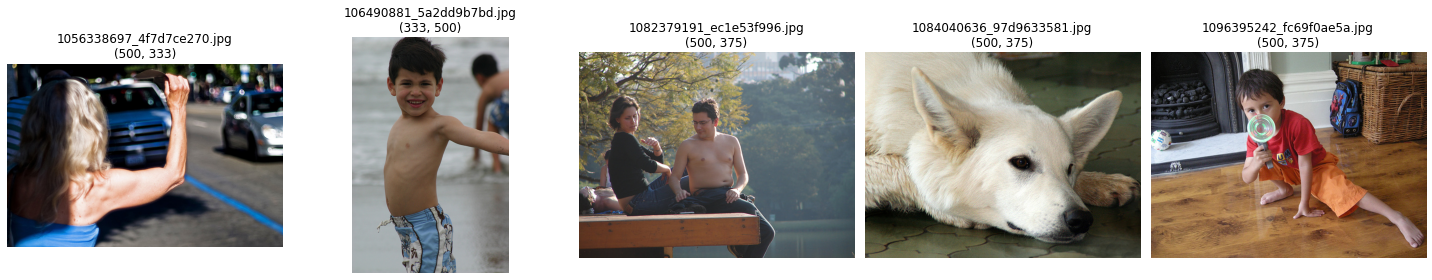

In [9]:
folder_path_1 = os.path.join('data', 'train_img')


train_img = []
for file in os.listdir(folder_path_1):
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        train_img.append(file)

train_img.sort()
first_5_images_tr = train_img[:5]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, img_name in enumerate(first_5_images_tr):
    img_path = os.path.join(folder_path_1, img_name)
    img = Image.open(img_path)

    axes[i].imshow(img)
    axes[i].set_title(f"{img_name}\n{img.size}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


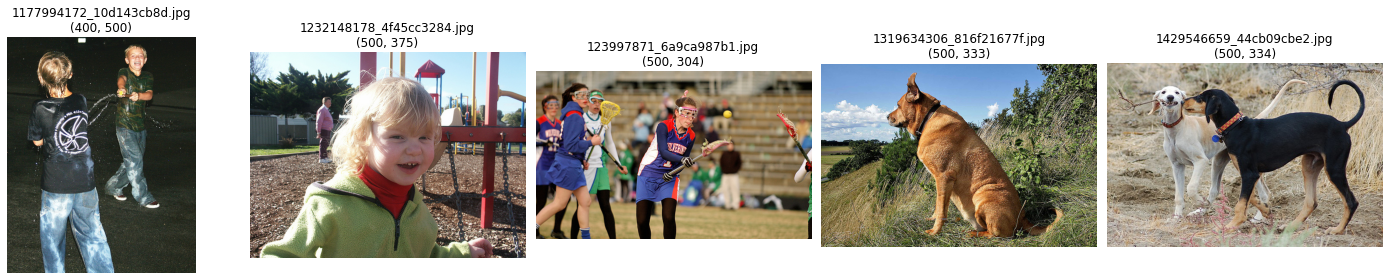

In [10]:
folder_path_2 = os.path.join('data', 'test_img')


test_img = []
for file in os.listdir(folder_path_2):
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        test_img.append(file)

test_img.sort()
first_5_images_ts = test_img[:5]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, img_name in enumerate(first_5_images_ts):
    img_path = os.path.join(folder_path_2, img_name)
    img = Image.open(img_path)

    axes[i].imshow(img)
    axes[i].set_title(f"{img_name}\n{img.size}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## __Общая информация__

__Комментарий:__ Информация по _train_dataset_

In [11]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


__Комментарий:__ Информация по _test_queries_

In [12]:
test_queries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  500 non-null    int64 
 1   query_id    500 non-null    object
 2   query_text  500 non-null    object
 3   image       500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


__Комментарий:__ Информация по _test_images_

In [13]:
test_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


__Комментарий:__ Информация по _expert_annotations_

In [14]:
expert_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   1056338697_4f7d7ce270.jpg    5821 non-null   object
 1   2549968784_39bfbe44f9.jpg#2  5821 non-null   object
 2   1                            5821 non-null   int64 
 3   1.1                          5821 non-null   int64 
 4   1.2                          5821 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


__Комментарий:__ Информация по _crowd_annotations_

In [15]:
crowd_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47829 entries, 0 to 47828
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   1056338697_4f7d7ce270.jpg    47829 non-null  object 
 1   1056338697_4f7d7ce270.jpg#2  47829 non-null  object 
 2   1                            47829 non-null  float64
 3   3                            47829 non-null  int64  
 4   0                            47829 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


__Промежуточный вывод__   
___
- Пропусков в данных не обнаружено  
- Типы данных корректны  

## __Предобработка данных__

In [16]:
crowd_annotations.columns = ['image', 'query_id', 'part', 'confirmed', 'declined']
crowd_annotations.head(5)

,image,query_id,part,confirmed,declined
0,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
1,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2204550058_2707d92338.jpg#2,0.0,0,3


In [17]:
expert_annotations.columns = ['image', 'query_id', 'exp_1', 'exp_2', 'exp_3']
expert_annotations.head(5)

,image,query_id,exp_1,exp_2,exp_3
0,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
1,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
3,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2
4,1056338697_4f7d7ce270.jpg,3360930596_1e75164ce6.jpg#2,1,1,1


__Комментарий:__

Переименнованные столбцы crowd_annotations:

- image -- имя файла изображения;
- query_id -- идентификатор описания;
- part -- доля исполнителей, подтвердивших, что текст соответствует картинке;
- confirmed -- количество исполнителей, подтвердивших, что текст соответствует картинке;
- declined -- количество исполнителей, подтвердивших, что текст не соответствует картинке.

Переименнованные столбцы expert_annotations:

- image -- имя файла изображения;
- query_id -- идентификатор описания;
- expert_1 -- оценка первого эксперта;
- expert_2 -- оценка второго эксперта;
- expert_3 -- оценка третьего эксперта.

### Дубликаты

In [18]:
train_dataset.duplicated().sum()

0

In [19]:
test_queries.duplicated().sum()

0

In [20]:
test_images.duplicated().sum()

0

In [21]:
crowd_annotations.duplicated().sum()

0

In [22]:
expert_annotations.duplicated().sum()

0

__Промежуточный вывод__   
___
- Дубликатов не обнаружено


## __Исследовательский анализ данных__

### Уникальные слова в train_dataset['query_text']

In [23]:
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))
               
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens=word_tokenize(text)           
    
    lemmas = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if len(token) > 2
        and token not in stop_words
        and token.isalpha()
    ]


    return lemmas


tqdm.pandas()
all_lemmas_1 = train_dataset['query_text'].progress_apply(clean_text)


all_words_1 = []
for lemma_list in all_lemmas_1:
    all_words_1.extend(lemma_list)


count_words_1 = Counter(all_words_1)
top_20_words_td = pd.DataFrame(count_words_1.most_common(20), columns=['word', 'frequency'])               

  0%|          | 0/5822 [00:00<?, ?it/s]

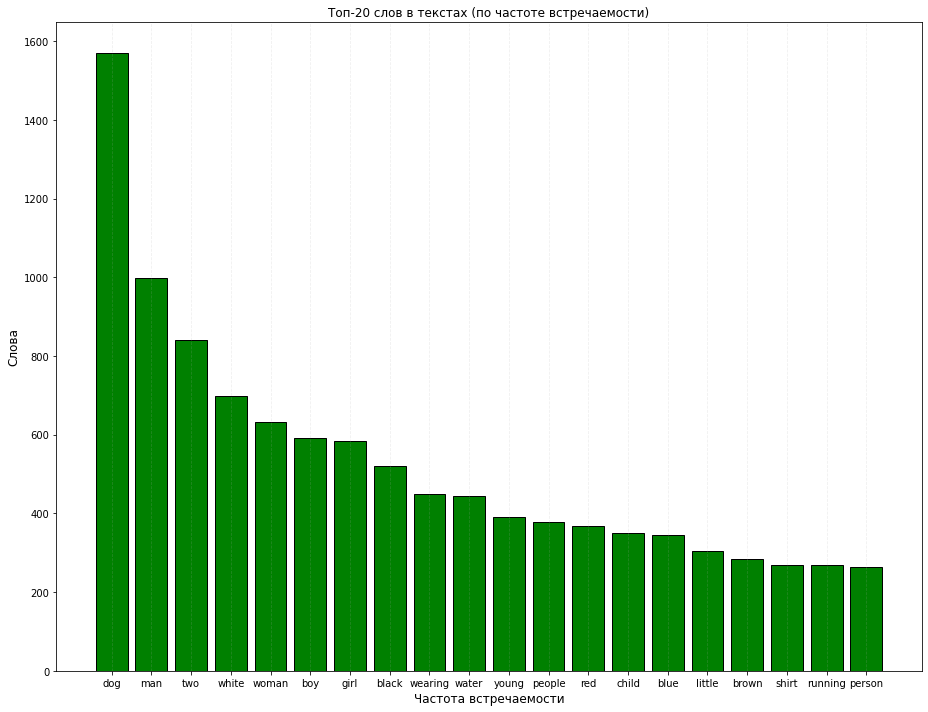

In [24]:
plt.figure(figsize=(13, 10))
plt.bar(top_20_words_td['word'], top_20_words_td['frequency'],
                    color='green', edgecolor='black')


plt.xlabel('Частота встречаемости', fontsize=12)
plt.ylabel('Слова', fontsize=12)
plt.title('Топ-20 слов в текстах (по частоте встречаемости)', fontsize=12)
plt.grid(axis='x', alpha=0.2, linestyle='--')
plt.tight_layout()
plt.show()



__Промежуточный вывод:__ Мы вывели наиболее часто встречающиеся слова в описании.  
    Топ-5 позиций занимают:
    
   - dog
   - man
   - white
   - woman
   - boy
    

### Распределение оценок экспертов expert_annotations

In [25]:
def visual_num(data, column):
    
    plt.figure(figsize=(6, 4))

    
    plt.hist(data[column], bins=5, alpha=0.7, edgecolor='black', color='lightblue')
    plt.title(f'Гистограмма: {column}')
    plt.xlabel('Значения')
    plt.ylabel('Частота')

    
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    print('Доп.информация:')
    return data[column].describe()

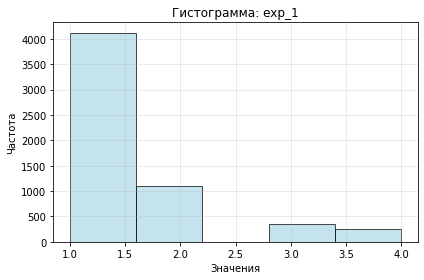

Доп.информация:


count    5821.000000
mean        1.436695
std         0.787130
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: exp_1, dtype: float64

In [26]:
visual_num(expert_annotations, 'exp_1')

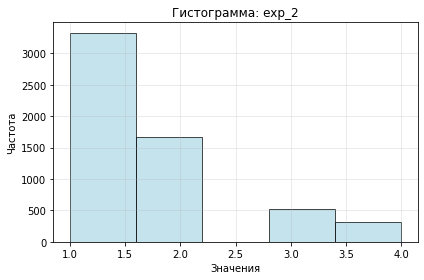

Доп.информация:


count    5821.000000
mean        1.624463
std         0.856256
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: exp_2, dtype: float64

In [27]:
visual_num(expert_annotations, 'exp_2')

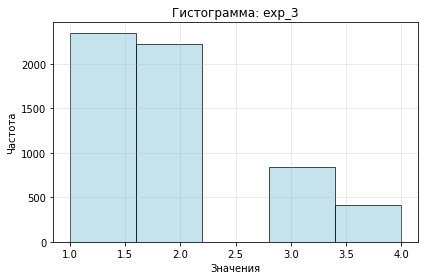

Доп.информация:


count    5821.000000
mean        1.882151
std         0.904091
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: exp_3, dtype: float64

In [28]:
visual_num(expert_annotations, 'exp_3')

__Промежуточный вывод:__

- Самая частая оценка всех экспертов - 1
- Самая редкая оценка экспретов - 4
- Эксперт с наиболее плавным распределением - 3
- Выбросов или аномалий не наблюдается

### Распределение оценок crowd_annotations

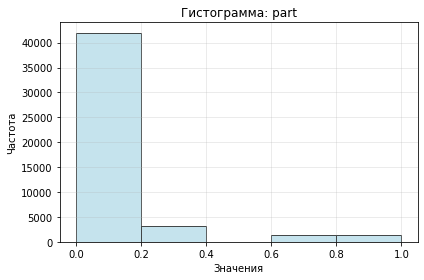

Доп.информация:


count    47829.000000
mean         0.068766
std          0.207490
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: part, dtype: float64

In [29]:
visual_num(crowd_annotations, 'part')

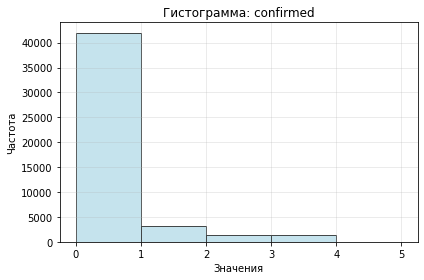

Доп.информация:


count    47829.000000
mean         0.208430
std          0.628775
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: confirmed, dtype: float64

In [30]:
visual_num(crowd_annotations, 'confirmed')

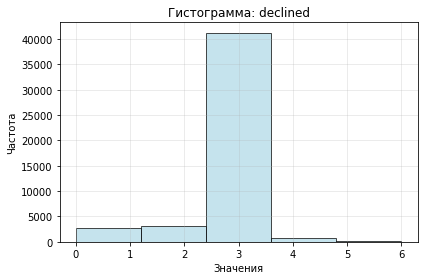

Доп.информация:


count    47829.000000
mean         2.820214
std          0.656556
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          6.000000
Name: declined, dtype: float64

In [31]:
visual_num(crowd_annotations, 'declined')

__Промежуточный вывод:__

- Аномалий и выбросов в данных не обнаружено   

- Средняя доля людей, подтверждивших, что описание соответствует изображению мала - всего 0.068. 0 - 0.1 - самое часто встречающееся значение.  

- Среднее количество людей, подтверждивших, что описание соответствует изображению - 0.2     

- Среднее количество людей, подтверждивших, что описание не соответствует изображению - 2.82. 3 - самое часто встречающеся значение

### Уникальные слова в test_queries['query_text']

In [32]:
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))
               
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens=word_tokenize(text)           
    
    lemmas = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if len(token) > 2
        and token not in stop_words
        and token.isalpha()
    ]


    return lemmas


tqdm.pandas()
all_lemmas_2 = train_dataset['query_text'].progress_apply(clean_text)


all_words_2 = []
for lemma_list in all_lemmas_2:
    all_words_2.extend(lemma_list)


count_words_2 = Counter(all_words_2)
top_20_words_td = pd.DataFrame(count_words_2.most_common(20), columns=['word', 'frequency'])   

  0%|          | 0/5822 [00:00<?, ?it/s]

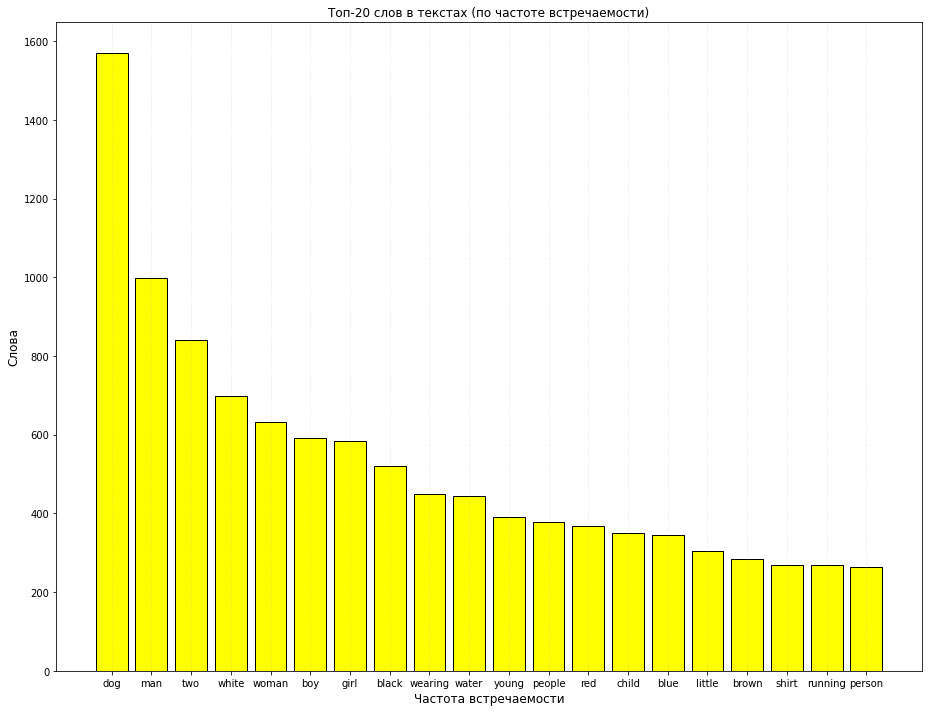

In [33]:
plt.figure(figsize=(13, 10))
plt.bar(top_20_words_td['word'], top_20_words_td['frequency'],
                    color='yellow', edgecolor='black')


plt.xlabel('Частота встречаемости', fontsize=12)
plt.ylabel('Слова', fontsize=12)
plt.title('Топ-20 слов в текстах (по частоте встречаемости)', fontsize=12)
plt.grid(axis='x', alpha=0.2, linestyle='--')
plt.tight_layout()
plt.show()


### Финализация оценок по группам

#### _Оценка экспертов_

__Комментарий:__ В качестве функции агрегации для объединения оценок возьму моду, так как она устойчива к выбросам и максимизирует правдоподобие в данной ситуации

In [34]:
expert_annotations['mode_score'] = expert_annotations[['exp_1', 'exp_2', 'exp_3']].mode(axis=1)[0]

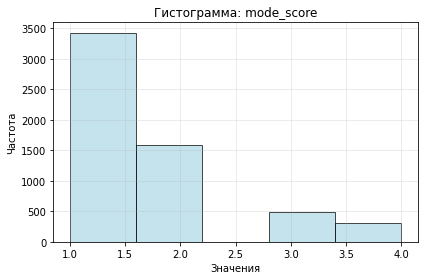

Доп.информация:


count    5821.000000
mean        1.602817
std         0.853909
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: mode_score, dtype: float64

In [35]:
visual_num(expert_annotations, 'mode_score')

#### _Оценка краудсорсинга_

__Комментарий:__ В данном случае оценка уже подсчитана в столбце part, так как по условию задания это - _"Доля исполнителей, подтвердивших, что текст соответствует картинке."_

### Объединение подготовленных данных

In [36]:
all_annotations = pd.merge(expert_annotations[['image', 'query_id', 'mode_score']],
                     crowd_annotations[['image', 'query_id', 'part']],
                     how='outer',
                     on=['image', 'query_id']
                    )
all_annotations.head(5)

,image,query_id,mode_score,part
0,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1.0,0.0
1,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1.0,NaN
2,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,2.0,NaN
3,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1.0,NaN
4,1056338697_4f7d7ce270.jpg,3360930596_1e75164ce6.jpg#2,1.0,NaN


In [37]:
all_annotations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51322 entries, 0 to 51321
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       51322 non-null  object 
 1   query_id    51322 non-null  object 
 2   mode_score  5821 non-null   float64
 3   part        47829 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.0+ MB


__Комментарий:__ Получилось много пропусков в оценке экспертов

__Комментарий:__  Теперь надо собрать наши оценки с учетом распределения весов. Мнению экспертов дадим вес 0.7, а краудсорсингу - 0.3.

In [38]:
exp_w = 0.7
crowd_w = 0.3


all_annotations['total_score'] = (
    all_annotations['mode_score'] * exp_w +
    all_annotations['part'] * crowd_w
)


all_annotations['total_score'] = all_annotations['total_score'].fillna(
    all_annotations['mode_score']
)


all_annotations['total_score'] = all_annotations['total_score'].fillna(
    all_annotations['part']
)

all_annotations=all_annotations.drop(['part', 'mode_score'], axis=1)
all_annotations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51322 entries, 0 to 51321
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        51322 non-null  object 
 1   query_id     51322 non-null  object 
 2   total_score  51322 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


In [39]:
all_annotations['total_score'] = np.where(all_annotations['total_score'] <= 2, 0, 1)

__Комментарий:__  Колонка общей оценки теперь без пропусков, остальные столбцы можно удалить. Датафрейм с целевым признаком готов!

__Комментарий:__ Осталось объединить данные в один датафрейм с тренировочными и целевым признаками

In [40]:
data = pd.merge(train_dataset[['image', 'query_id', 'query_text']],
                     all_annotations[['image', 'query_id', 'total_score']],
                     how='outer',
                     on=['image', 'query_id']
                    )
data.head(5)

,image,query_id,query_text,total_score
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51322 entries, 0 to 51321
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image        51322 non-null  object
 1   query_id     51322 non-null  object
 2   query_text   5822 non-null   object
 3   total_score  51322 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


__Комментарий:__ Очистим данные от пропусков и дубликатов

In [42]:
data.isna().sum()

image              0
query_id           0
query_text     45500
total_score        0
dtype: int64

In [43]:
data.duplicated().sum()

0

In [44]:
text_dict = {}
for query_id in data['query_id'].unique():

    texts = data[
        (data['query_id'] == query_id) &
        (data['query_text'].notna())
    ]['query_text'].unique()

    if len(texts) > 0:

        text_dict[query_id] = texts[0]
    else:
        text_dict[query_id] = None


for i in range(len(data)):
    if pd.isna(data.loc[i, 'query_text']):
        query_id = data.loc[i, 'query_id']
        if query_id in text_dict and text_dict[query_id] is not None:
            data.loc[i, 'query_text'] = text_dict[query_id]

In [45]:
data.isna().sum()

image             0
query_id          0
query_text     1109
total_score       0
dtype: int64

In [46]:
data.dropna(axis=0, inplace = True)
data.isna().sum()

image          0
query_id       0
query_text     0
total_score    0
dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50213 entries, 0 to 51321
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image        50213 non-null  object
 1   query_id     50213 non-null  object
 2   query_text   50213 non-null  object
 3   total_score  50213 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


__Комментарий:__ Данные успешно очищены

### Проверка данных

__Комментарий:__ Все изображения, которые нарушают закон о несовершеннолетних, нужно удалить из обучающей выборки.

In [48]:
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))
               
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens=word_tokenize(text)           
    
    lemmas = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if len(token) > 2
        and token not in stop_words
        and token.isalpha()
    ]


    return lemmas


tqdm.pandas()
all_lemmas_3 = train_dataset['query_text'].progress_apply(clean_text)


all_words_3 = []
for lemma_list in all_lemmas_3:
    all_words_3.extend(lemma_list)


count_words_3 = Counter(all_words_3)
words_td = pd.DataFrame(list(count_words_3.items()), columns=['word', 'frequency'])

pd.set_option('display.max_rows', None)
words_td  

  0%|          | 0/5822 [00:00<?, ?it/s]

,word,frequency
0,young,391
1,child,349
2,wearing,450
3,blue,346
4,goggles,12
5,sitting,214
6,float,33
7,pool,142
8,girl,584
9,yellow,137


In [49]:
#Отбераем те, которые явно указывают на детей
exclude=['child', 'girl', 'boy', 'little', 'kid', 'baby', 'girls', 'children', 'boys' ,'youth',
'Kids', 'students', 'Girl', 'kids','guys', 'babies', 'teenage', 'Girls', 'teenagers', 'kiddie', 'Children']


In [50]:
#берем слова из тех, которые указывают на детей и исключаем строки с ними из выборки
for word in exclude:
    word= r'\b(' + '|'.join(exclude) + r')\b'
    mask = data['query_text'].str.contains(word, na=False, case=False)

bad_data=data[mask]
data = data[~mask]
    
    
bad_images = set()
for query_id in bad_data['query_id']:
    image_name = query_id.split('#')[0]
    bad_images.add(image_name)

print(f"Запрещенных изображений: {len(bad_images)}")


/opt/conda/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Запрещенных изображений: 293


In [51]:
data = data[~data['image'].isin(bad_images)].copy()
print(f"Стало: {len(data)} строк")

Стало: 28586 строк


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28586 entries, 22 to 51321
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image        28586 non-null  object
 1   query_id     28586 non-null  object
 2   query_text   28586 non-null  object
 3   total_score  28586 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


__Комментарий:__ В датасете осталось  28586 строк относительно 51321 со словами- признаками

## __Векторизация изображений__

In [53]:
resnet = models.resnet18(pretrained = True)

for param in resnet.parameters():
    param.requires_grad_(False)

print(list(resnet.children()))

modules = list(resnet.children())[:-1]
resnet = nn.Sequential(*modules)

resnet.eval()

/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False), BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), ReLU(inplace=True), MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False), Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bia

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [54]:
norm = transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
preprocess = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor(),norm])

In [55]:
def vect_img(row):
    img_path = os.path.join(path, row[0])
    img = Image.open(img_path).convert('RGB')
    image_tensor = preprocess(img)
    output_tensor = resnet(image_tensor.unsqueeze(0)).flatten()
    return output_tensor.numpy()

PATH = 'data'
path = os.path.join(PATH, 'train_img')


unique_data = data.drop_duplicates(subset=[data.columns[0]])
print(f"Уникальных изображений для обработки: {len(unique_data)}")

features_series = unique_data.progress_apply(vect_img, axis=1)
unique_img_vec_arr = np.array(features_series.tolist())

print(f"Векторизация завершена! Размер результата: {unique_img_vec_arr.shape}")
print(f"Обработано: {unique_img_vec_arr.shape[0]} уникальных изображений")

Уникальных изображений для обработки: 707


  0%|          | 0/707 [00:00<?, ?it/s]

Векторизация завершена! Размер результата: (707, 512)
Обработано: 707 уникальных изображений


__Комментарий:__ Векторизация прошла успешно

## __Векторизация текстов__

In [56]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

def clean_text(text):
    if pd.isna(text):
        return ""
    
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)  
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = word_tokenize(text)           
    
    lemmas = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if len(token) > 2
        and token not in stop_words
        and token.isalpha()
    ]

    return ' '.join(lemmas)

data['lemma_text'] = data['query_text'].apply(clean_text)


tfidf_vectorizer = TfidfVectorizer(
    stop_words=list(stopwords)                  
)

data_unique = data.drop_duplicates(subset=['query_text'])
print(f"После удаления дубликатов текстов: {data_unique.shape}")


data_unique = data.drop_duplicates(
    subset=['query_text'], 
    keep='first'  # или 'last'
)


corpus_unique = data_unique['lemma_text'].values
tf_idf_unique = tfidf_vectorizer.fit_transform(corpus_unique)

print(f"Уникальная матрица: {tf_idf_unique.shape}")

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


После удаления дубликатов текстов: (684, 5)
Уникальная матрица: (684, 1032)


__Комментарий:__ Векторизация прошла успешно

## __Объединение векторов__

In [57]:
unique_image_names = data['image'].unique()  
print(f"Уникальных изображений: {len(unique_image_names)}")


img_features_df = pd.DataFrame(
    unique_img_vec_arr,
    columns=[f'img_feat_{i}' for i in range(unique_img_vec_arr.shape[1])]
)


img_features_df['image'] = unique_image_names



Уникальных изображений: 707


In [58]:
tf_idf_dense = tf_idf_unique.toarray()
tf_idf_df = pd.DataFrame(
    tf_idf_dense,
    columns=[f'tfidf_{i}' for i in range(tf_idf_dense.shape[1])]
)
tf_idf_df['query_text'] = data_unique['query_text'].values

In [59]:
final_data = data.merge( 
    img_features_df,
    on='image', 
    how='inner'
).merge(
    tf_idf_df, 
    on='query_text', 
    how='inner'
)

print(f"Исходный размер: {data.shape}")
print(f"Финальный размер с фичами: {final_data.shape}")

Исходный размер: (28586, 5)
Финальный размер с фичами: (28586, 1549)


In [60]:
final_data=final_data.drop(columns=['query_id', 'query_text','lemma_text'])

print(f"Исходный размер: {data.shape}")
print(f"Финальный размер с фичами: {final_data.shape}")

Исходный размер: (28586, 5)
Финальный размер с фичами: (28586, 1546)


In [61]:
final_data.head(5)

,image,total_score,img_feat_0,img_feat_1,img_feat_2,img_feat_3,img_feat_4,img_feat_5,img_feat_6,img_feat_7,...,tfidf_1022,tfidf_1023,tfidf_1024,tfidf_1025,tfidf_1026,tfidf_1027,tfidf_1028,tfidf_1029,tfidf_1030,tfidf_1031
0,1056338697_4f7d7ce270.jpg,0,0.693982,3.031816,2.916986,0.951920,0.936225,1.245219,0.826551,1.108059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3187395715_f2940c2b72.jpg,0,0.272048,2.482058,1.620015,1.238900,1.795411,0.700269,0.333748,0.682300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,463978865_c87c6ca84c.jpg,0,0.980668,3.829165,1.296617,0.803800,0.516709,0.409086,0.724091,0.838845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,488590040_35a3e96c89.jpg,0,1.519510,1.070954,0.178771,0.297532,0.567791,0.143536,1.374603,0.297599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,534875358_6ea30d3091.jpg,0,0.341053,3.860156,1.173058,0.526688,0.542608,0.759330,0.779955,0.009412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
final_data['target']=final_data.pop('total_score')

__Комментарий:__ Векторы объединены успешно

## __Обучение модели предсказания соответствия__

### Построение бэйзлайна

In [63]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)

train_indices, valid_indices = next(gss.split(X=final_data.drop(columns=['target']), y=final_data['target'], groups=data['image']))
train_df, valid_df = final_data.loc[train_indices], final_data.loc[valid_indices]

In [64]:

X_train = train_df.drop(columns=['target', 'image'])
y_train = train_df['target']

X_valid = valid_df.drop(columns=['target', 'image'])
y_valid = valid_df['target']

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_valid_scaled = scaler_X.transform(X_valid)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_valid_scaled = scaler_y.transform(y_valid.values.reshape(-1, 1)).flatten()
#X_valid = valid_df.drop(columns=['target', 'image'])
#y_valid = valid_df['target']


lr=LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)
lr_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

print("RMSE модели линейной регрессии:")
print(f"RMSE: {lr_rmse:.6f}")


RMSE модели линейной регрессии:
RMSE: 0.257367


__Комментарий:__ Бэйзлайн построен

### Пострение модели

__Коментарйи студента:__ Зададим класс и количество нейронов

In [65]:

n_in_neurons=1544
hidden_n1 = 512  
hidden_n2 = 256    
hidden_n3 = 128  
n_out_neurons=1


class Net(nn.Module):        
    def __init__(self, n_in_neurons, hidden_n1, hidden_n2, hidden_n3, n_out_neurons):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(n_in_neurons, hidden_n1)
#        self.bn1 = nn.BatchNorm1d(hidden_n1)  
        self.act1 = nn.ReLU()
#        self.drop1 = nn.Dropout(0.3)  
        
        self.fc2 = nn.Linear(hidden_n1, hidden_n2)
#        self.bn2 = nn.BatchNorm1d(hidden_n2)
        self.act2 = nn.ReLU()
#        self.drop2 = nn.Dropout(0.3)
        
        self.fc3 = nn.Linear(hidden_n2, hidden_n3)
#        self.bn3 = nn.BatchNorm1d(hidden_n3)
        self.act3 = nn.ReLU()
#        self.drop3 = nn.Dropout(0.2)
        
        self.fc4 = nn.Linear(hidden_n3, n_out_neurons)
        self.act4 = nn.Sigmoid()  
        
        
        nn.init.kaiming_uniform_(self.fc1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc2.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc3.weight, mode='fan_in', nonlinearity='relu')
        nn.init.xavier_uniform_(self.fc4.weight)  
        
    def forward(self, x):
        x = self.fc1(x)
#        x = self.bn1(x)
        x = self.act1(x)
#        x = self.drop1(x)
        
        x = self.fc2(x)
#        x = self.bn2(x)
        x = self.act2(x)
#        x = self.drop2(x)
        
        x = self.fc3(x)
#        x = self.bn3(x)
        x = self.act3(x)
#        x = self.drop3(x)
        
        x = self.fc4(x)
        x = self.act4(x)  
        
        return x


net = Net(n_in_neurons, hidden_n1, hidden_n2, hidden_n3, n_out_neurons)

In [66]:

net=Net(n_in_neurons, hidden_n1, hidden_n2, hidden_n3, n_out_neurons)

optimizer=torch.optim.Adam(net.parameters(), lr=1.0e-03)


loss=nn.BCELoss()


epochs = 100
batch_size = 100
num_batches = ceil(len(X_train)/batch_size)

X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.FloatTensor(y_train.values)
X_valid_tensor = torch.FloatTensor(X_valid.values)
y_valid_tensor = torch.FloatTensor(y_valid.values)
#for optimizer in optimizers:
#    optimizer_rmse = []
    
optimizer_rmse = [] 

for epoch in range(epochs):
    net.train()
    order=np.random.permutation(len(X_train))
        
    for batch in range(num_batches):
        start_idx=batch*batch_size
        optimizer.zero_grad()
            
        b_indexes = order[start_idx:start_idx+batch_size]
        X_b = X_train_tensor[b_indexes]
        y_b = y_train_tensor[b_indexes]
            
        preds = net.forward(X_b).flatten()
        loss_res = loss(preds, y_b)
        loss_res.backward()
        optimizer.step()
            
    if epoch % 100== 0 or epoch == epochs-1:
    #if epoch % 10 == 0 or epoch == epochs-1:
        with torch.no_grad():
            net.eval()
            test_preds= net.forward(X_valid_tensor).flatten()
            result = round(float(torch.sqrt(loss(test_preds, y_valid_tensor))), 2)
            print(f'Метрика RMSE, {epoch} итерация =', result)
            optimizer_rmse.append(result)
print()
print(f'Лучшая метрика RMSE : {min(optimizer_rmse)} ')
print('---------------------------------------------------------------------------------------------', '\n')
          

Метрика RMSE, 0 итерация = 0.34
Метрика RMSE, 99 итерация = 0.69

Лучшая метрика RMSE : 0.34 
--------------------------------------------------------------------------------------------- 



__Комментарий:__ Модель сформирована и обучена

## __Тестирование модели__

### Обработка тестовых данных

__Комментарий:__ Обрабатываем данные тестовой выборки

In [67]:
test_queries=test_queries.drop('Unnamed: 0', axis=1)

In [68]:
"""
Векторизация текстов для теста

"""
test_queries['lemma_text'] = test_queries['query_text'].apply(clean_text)


tfidf_vectorizer = TfidfVectorizer(
    stop_words=list(stopwords)                  
)

test_queries_unique = test_queries.drop_duplicates(subset=['query_text'])
print(f"После удаления дубликатов текстов: {test_queries_unique.shape}")


test_queries_unique = test_queries.drop_duplicates(
    subset=['query_text'], 
    keep='first'  
)


corpus_unique_2 = test_queries_unique['lemma_text'].values
tf_idf_unique_2 = tfidf_vectorizer.fit_transform(corpus_unique_2)

print(f"Уникальная матрица: {tf_idf_unique_2.shape}")


После удаления дубликатов текстов: (500, 4)
Уникальная матрица: (500, 741)


In [69]:
"""
Векторизация изображений для теста

"""

def vect_img_2(row_2):
    clean_name = row_2[0].split('#')[0]
    img_path_2 = os.path.join(path_2, clean_name)     
#    img_path_2 = os.path.join(path_2, row_2[0])
    img_2 = Image.open(img_path_2).convert('RGB')
    image_tensor_2 = preprocess(img_2)
    output_tensor_2 = resnet(image_tensor_2.unsqueeze(0)).flatten()
    return output_tensor_2.numpy()

PATH_2 = 'data'
path_2 = os.path.join(PATH_2, 'test_img')


unique_data_2 = test_queries.drop_duplicates(subset=[test_queries.columns[0]])
print(f"Уникальных изображений для обработки: {len(unique_data_2)}")

print("Начинаем векторизацию уникальных изображений...")


features_series_2 = unique_data_2.progress_apply(vect_img_2, axis=1)
unique_img_vec_arr_2 = np.array(features_series_2.tolist())

print(f"Векторизация завершена! Размер результата: {unique_img_vec_arr_2.shape}")
print(f"Обработано: {unique_img_vec_arr_2.shape[0]} уникальных изображений")

Уникальных изображений для обработки: 500
Начинаем векторизацию уникальных изображений...


  0%|          | 0/500 [00:00<?, ?it/s]

Векторизация завершена! Размер результата: (500, 512)
Обработано: 500 уникальных изображений


In [70]:
unique_image_names_test = test_queries['image'].unique()  
print(f"Уникальных изображений: {len(unique_image_names_test)}")

img_features_df_test = pd.DataFrame(
    unique_img_vec_arr_2[:len(unique_image_names_test)],  
    columns=[f'img_feat_{i}' for i in range(unique_img_vec_arr_2.shape[1])]
)


img_features_df_test['image'] = unique_image_names_test


Уникальных изображений: 100


In [71]:
print(f"Размер unique_img_vec_arr_2: {unique_img_vec_arr_2.shape}")
print(f"Количество уникальных изображений: {len(unique_image_names_test)}")

Размер unique_img_vec_arr_2: (500, 512)
Количество уникальных изображений: 100


In [72]:
tf_idf_dense_test = tf_idf_unique_2.toarray()

tf_idf_df_test = pd.DataFrame(
    tf_idf_dense_test,
    columns=[f'tfidf_{i}' for i in range(tf_idf_dense_test.shape[1])]  
)


tf_idf_df_test['query_text'] = test_queries['query_text'].values  

print(f"Создан DataFrame с {tf_idf_df_test.shape[0]} строками")

Создан DataFrame с 500 строками


In [73]:
final_data_test = test_queries.merge( 
    img_features_df_test,
    on='image', 
    how='inner'
).merge(
    tf_idf_df_test, 
    on='query_text', 
    how='inner'
)

print(f"Исходный размер: {test_queries.shape}")
print(f"Финальный размер с фичами: {final_data_test.shape}")

Исходный размер: (500, 4)
Финальный размер с фичами: (500, 1257)


In [74]:
final_data_test=final_data_test.drop('lemma_text', axis=1)

print(f"Исходный размер: {test_queries.shape}")
print(f"Финальный размер с фичами: {final_data_test.shape}")

Исходный размер: (500, 4)
Финальный размер с фичами: (500, 1256)


In [75]:
final_data_test.head(5)

,query_id,query_text,image,img_feat_0,img_feat_1,img_feat_2,img_feat_3,img_feat_4,img_feat_5,img_feat_6,...,tfidf_731,tfidf_732,tfidf_733,tfidf_734,tfidf_735,tfidf_736,tfidf_737,tfidf_738,tfidf_739,tfidf_740
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg,0.443964,2.334485,0.006339,2.394352,0.022514,0.32974,1.683887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg,0.443964,2.334485,0.006339,2.394352,0.022514,0.32974,1.683887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg,0.443964,2.334485,0.006339,2.394352,0.022514,0.32974,1.683887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg,0.443964,2.334485,0.006339,2.394352,0.022514,0.32974,1.683887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg,0.443964,2.334485,0.006339,2.394352,0.022514,0.32974,1.683887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430526,0.0


### Тупик (тест)

In [76]:
RANDOM_STATE=42
final_data_t=final_data_test.copy()
random_queries = final_data_t['query_text'].drop_duplicates().sample(n=10, 
                                                                           random_state=RANDOM_STATE
                                                                          ).tolist()

ПОДГОТОВКА ДАННЫХ ДЛЯ ПРЕДСКАЗАНИЙ...
⚠️ ВНИМАНИЕ: Размерности не совпадают! (1253 != 1544)

ДЕЛАЕМ ПРЕДСКАЗАНИЯ...
Сделано предсказаний: 500

АНАЛИЗ РЕЗУЛЬТАТОВ:

Количество предсказаний > 0.5: 1 (0.2%)
Количество предсказаний > 0.7: 0 (0.0%)
Количество предсказаний > 0.9: 0 (0.0%)

СОХРАНЕНИЕ РЕЗУЛЬТАТОВ...

ПРИМЕРЫ ПРЕДСКАЗАНИЙ:

🔝 ТОП-5 САМЫХ ВЫСОКИХ ПРЕДСКАЗАНИЙ:
  0.5027 - 1991806812_065f747689.jpg
    Текст: a kickboxer jumping for a kick...
  0.2653 - 2977379863_2e8d7a104e.jpg
    Текст: Children in costumes standing in line ....
  0.0106 - 2431120202_b24fe2333a.jpg
    Текст: Little girl on skis...
  0.0086 - 2431120202_b24fe2333a.jpg
    Текст: A girl on skis in snow ....
  0.0061 - 1177994172_10d143cb8d.jpg
    Текст: Two boys spraying each other with water...

ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЯ:


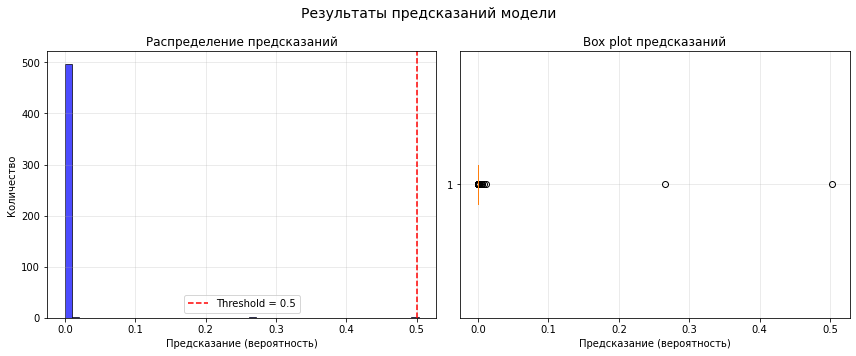


ПОИСК ПО КОНКРЕТНОМУ ЗАПРОСУ:
Случайный запрос: 'People are watching a race car speed thorugh the dirt .'
Найдено 1 изображений для этого запроса:
  0.0000 - 3487131146_9d3aca387a.jpg


In [80]:
# ==================== 1. ПОДГОТОВКА ДАННЫХ ====================
print("ПОДГОТОВКА ДАННЫХ ДЛЯ ПРЕДСКАЗАНИЙ...")

# Убираем текстовые колонки, оставляем только числовые фичи
columns_to_drop = ['query_text', 'image', 'lemma_text', 'Unnamed: 0', 'query_id']
columns_to_drop = [col for col in columns_to_drop if col in final_data_test.columns]

X_test_numeric = final_data_test.drop(columns=columns_to_drop)

# Если размерности не совпадают, исправляем
if X_test_numeric.shape[1] != n_in_neurons:
    print(f"⚠️ ВНИМАНИЕ: Размерности не совпадают! ({X_test_numeric.shape[1]} != {n_in_neurons})")
    
    # Дополняем нулями если фич меньше
    if X_test_numeric.shape[1] < n_in_neurons:
#        print(f"Дополняем {n_in_neurons - X_test_numeric.shape[1]} нулями...")
        padding = np.zeros((X_test_numeric.shape[0], n_in_neurons - X_test_numeric.shape[1]))
        X_test_numeric = np.hstack([X_test_numeric.values, padding])
        X_test_numeric = pd.DataFrame(X_test_numeric)
    # Обрезаем если фич больше
    else:
#        print(f"Обрезаем {X_test_numeric.shape[1] - n_in_neurons} лишних фич...")
        X_test_numeric = X_test_numeric.iloc[:, :n_in_neurons]
    
#    print(f"Исправленный размер: {X_test_numeric.shape}")

# Преобразуем в тензор
X_test_tensor = torch.FloatTensor(X_test_numeric.values)
#print(f"Тензор создан: {X_test_tensor.shape}")

# ==================== 2. ПРЕДСКАЗАНИЯ ====================
print("\n" + "="*60)
print("ДЕЛАЕМ ПРЕДСКАЗАНИЯ...")
print("="*60)

# Переводим модель в режим оценки
net.eval()

# Делаем предсказания (без вычисления градиентов)
with torch.no_grad():
    predictions = net.forward(X_test_tensor).flatten()
    predictions_np = predictions.numpy()

print(f"Сделано предсказаний: {len(predictions_np)}")

# ==================== 3. АНАЛИЗ РЕЗУЛЬТАТОВ ====================
print("\n" + "="*60)
print("АНАЛИЗ РЕЗУЛЬТАТОВ:")
print("="*60)

# Распределение предсказаний
print(f"\nКоличество предсказаний > 0.5: {(predictions_np > 0.5).sum()} ({(predictions_np > 0.5).mean()*100:.1f}%)")
print(f"Количество предсказаний > 0.7: {(predictions_np > 0.7).sum()} ({(predictions_np > 0.7).mean()*100:.1f}%)")
print(f"Количество предсказаний > 0.9: {(predictions_np > 0.9).sum()} ({(predictions_np > 0.9).mean()*100:.1f}%)")

# ==================== 4. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ ====================
print("\n" + "="*60)
print("СОХРАНЕНИЕ РЕЗУЛЬТАТОВ...")
print("="*60)

# Создаем DataFrame с результатами
results_df = final_data_test.copy()

# Добавляем предсказания
results_df['prediction_score'] = predictions_np
results_df['prediction_label'] = (predictions_np > 0.5).astype(int)

# Сохраняем в CSV


# ==================== 5. ВЫВОД ПРИМЕРОВ ====================
print("\n" + "="*60)
print("ПРИМЕРЫ ПРЕДСКАЗАНИЙ:")
print("="*60)

# Топ-5 самых высоких предсказаний
print("\n🔝 ТОП-5 САМЫХ ВЫСОКИХ ПРЕДСКАЗАНИЙ:")
top_5 = results_df.nlargest(5, 'prediction_score')[['query_text', 'image', 'prediction_score']]
for idx, row in top_5.iterrows():
    print(f"  {row['prediction_score']:.4f} - {row['image']}")
    print(f"    Текст: {row['query_text'][:80]}...")


# ==================== 6. ВИЗУАЛИЗАЦИЯ ====================
print("\n" + "="*60)
print("ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЯ:")
print("="*60)



fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма предсказаний
axes[0].hist(predictions_np, bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].axvline(x=0.5, color='red', linestyle='--', label='Threshold = 0.5')
axes[0].set_xlabel('Предсказание (вероятность)')
axes[0].set_ylabel('Количество')
axes[0].set_title('Распределение предсказаний')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(predictions_np, vert=False)
axes[1].set_xlabel('Предсказание (вероятность)')
axes[1].set_title('Box plot предсказаний')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Результаты предсказаний модели', fontsize=14)
plt.tight_layout()
plt.show()

# ==================== 7. ПОИСК ПО КОНКРЕТНОМУ ЗАПРОСУ ====================
print("\n" + "="*60)
print("ПОИСК ПО КОНКРЕТНОМУ ЗАПРОСУ:")
print("="*60)

# Выбираем случайный запрос из данных
random_query = final_data_test['query_text'].sample(1).iloc[0]
print(f"Случайный запрос: '{random_query}'")

# Находим все строки с этим запросом
query_results = results_df[results_df['query_text'] == random_query]

if len(query_results) > 0:
    print(f"Найдено {len(query_results)} изображений для этого запроса:")
    
    # Сортируем по предсказанию
    query_results_sorted = query_results.sort_values('prediction_score', ascending=False)
    
    for idx, row in query_results_sorted.iterrows():
        print(f"  {row['prediction_score']:.4f} - {row['image']}")
else:
    print("Нет изображений для этого запроса")

